In [26]:
# eisagwgh aparaithtwn vivliothikwn 
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

In [27]:
df=pd.read_excel('loan.xlsx')
df.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [28]:
df.shape


(614, 13)

In [29]:
df.isna().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
df['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

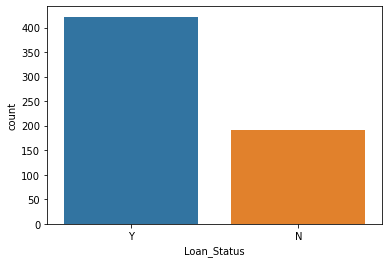

In [31]:
sns.countplot(df['Loan_Status'],label='count')


In [32]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [33]:
# posotikopoihsh kathgorikwn timwn
labelencoder_y=LabelEncoder()
df['Loan_Status']=labelencoder_y.fit_transform(df['Loan_Status'].values)
df['Education']=labelencoder_y.fit_transform(df['Education'].values)
df['Property_Area']=labelencoder_y.fit_transform(df['Property_Area'].values) 

In [34]:
# xeirismos timwn pou leipoun
df['LoanAmount']=df['LoanAmount'].replace(np.nan,np.mean(df['LoanAmount']))
df['Loan_Amount_Term']=df['Loan_Amount_Term'].replace(np.nan,np.mean(df['Loan_Amount_Term']))
df['Credit_History']=df['Credit_History'].replace(np.nan,0)

In [35]:
df.shape

(614, 13)

In [36]:
# emfanhsh tupou dedomenwn gia thn parakatw katallhlh epeksergasia tous
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education              int32
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [37]:
# diagrafh sthlwn
df=df.drop(columns=['Self_Employed','Gender','Married','Dependents'],axis=1)

In [47]:
# efarmogh aplhs logistikhs palindromhshs
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

sc=StandardScaler() 
X_train=sc.fit_transform(X_train) 
X_test=sc.fit_transform(X_test)

lreg=LogisticRegression()
lreg.fit(X_train,Y_train)
predictions=lreg.predict(X_test)

print(accuracy_score(predictions,Y_test))

0.7886178861788617


In [39]:
# fortwsh dedomenwn

clients_path = r".\data 2\clients.csv"
loans_path = r".\data 2\loans.csv"
payments_path = r".\data 2\payments.csv"
clients = pd.read_csv(clients_path, parse_dates=["joined"])
loans = pd.read_csv(loans_path, parse_dates=['loan_start', 'loan_end'])
payments = pd.read_csv(payments_path, parse_dates = ['payment_date'])

In [40]:
# episkophsh dedomenwn pelatwn
clients.head()

,client_id,joined,income,credit_score
0,46109,2002-04-16,172677,527
1,49545,2007-11-14,104564,770
2,41480,2013-03-11,122607,585
3,46180,2001-11-06,43851,562
4,25707,2006-10-06,211422,621


In [41]:
# episkophsh dedomenwn daneiwn
loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [42]:
# episkophsh dedomenwn plhrwmwn
payments.head()

,loan_id,payment_amount,payment_date,missed
0,10243,2369,2002-05-31,1
1,10243,2439,2002-06-18,1
2,10243,2662,2002-06-29,0
3,10243,2268,2002-07-20,0
4,10243,2027,2002-07-31,1


In [43]:
# dhmiourgia sthlhs "mhnas"
clients['month_of_a_year_joined'] = clients['joined'].dt.month

# dhmiourgia sthlhs "log eisodhmatos"
clients['log_of_income_amount'] = np.log(clients['income'])

In [44]:
clients.head()

,client_id,joined,income,credit_score,month_of_a_year_joined,log_of_income_amount
0,46109,2002-04-16,172677,527,4,12.059178
1,49545,2007-11-14,104564,770,11,11.557555
2,41480,2013-03-11,122607,585,3,11.716739
3,46180,2001-11-06,43851,562,11,10.688553
4,25707,2006-10-06,211422,621,10,12.261611


In [45]:
# omadopoihsh twn id twn pelatwn kai upologismos : mesou orou, megistou kai elaxistou apo prohgoumena daneia
loan_statistics = loans.groupby('client_id')['loan_amount'].agg(['mean', 'max', 'min'])
loan_statistics.columns = ['avg_loan_amount', 'max_loan_amount', 'min_loan_amount']
loan_statistics.head()

,avg_loan_amount,max_loan_amount,min_loan_amount
client_id,,,
25707,7963.950000,13913,1212
26326,7270.062500,13464,1164
26695,7824.722222,14865,2389
26945,7125.933333,14593,653
29841,9813.000000,14837,2778


In [46]:
# sugxwneush me to dataframe twn pelatwn
updated_clients = clients.merge(loan_statistics, left_on = 'client_id', right_index=True, how = 'left')
updated_clients.head()

,client_id,joined,income,credit_score,month_of_a_year_joined,log_of_income_amount,avg_loan_amount,max_loan_amount,min_loan_amount
0,46109,2002-04-16,172677,527,4,12.059178,8951.60,14049,559
1,49545,2007-11-14,104564,770,11,11.557555,10289.30,14971,3851
2,41480,2013-03-11,122607,585,3,11.716739,7894.85,14399,811
3,46180,2001-11-06,43851,562,11,10.688553,7700.85,14081,1607
4,25707,2006-10-06,211422,621,10,12.261611,7963.95,13913,1212
